<a href="https://colab.research.google.com/github/SeongHyeon0409/practice/blob/master/%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC%EA%B3%BC%EC%A0%9C_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

중간고사 과제 1
- 주어진 영상에 대하여 팽창, 침식, 열림, 닫기 연산을 위한 함수를 구현

In [147]:
import cv2
import numpy
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [148]:
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

주어진 영상을 읽고 가시화

In [149]:
!wget https://www.shrednations.com/wp-content/uploads/corporate-espionage.jpg

--2021-10-22 07:10:47--  https://www.shrednations.com/wp-content/uploads/corporate-espionage.jpg
Resolving www.shrednations.com (www.shrednations.com)... 173.255.203.102
Connecting to www.shrednations.com (www.shrednations.com)|173.255.203.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254792 (249K) [image/jpeg]
Saving to: ‘corporate-espionage.jpg.14’

corporate-espionage 100%[===================>] 248.82K  --.-KB/s    in 0.1s    

2021-10-22 07:10:48 (2.14 MB/s) - ‘corporate-espionage.jpg.14’ saved [254792/254792]



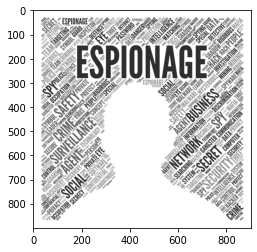

900 900


In [150]:
img = cv2.imread('corporate-espionage.jpg', 0)
plt.imshow(img, 'gray')
plt.show()
height, width  = img.shape
print(width, height)

영상 이진화

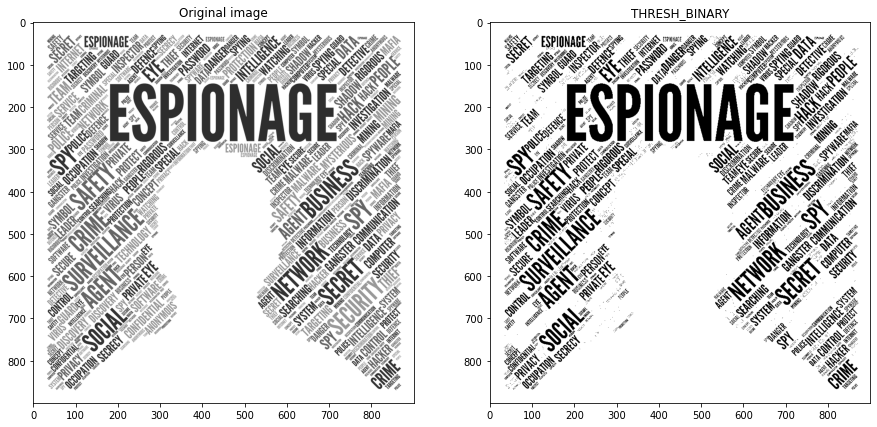

In [151]:
ret, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Plot the images
images = [img, binary_img]
titles = ['Original image', 'THRESH_BINARY']
plot_img(images, titles)

문제 1: 4연결성 기준 3X3, 5X5 팽창, 침식, 열기, 닫기 함수를 구현하고 이에 대한 결과를 가시화하기
- 필터의 모양은 아래 그림을 참고하여사용할 것

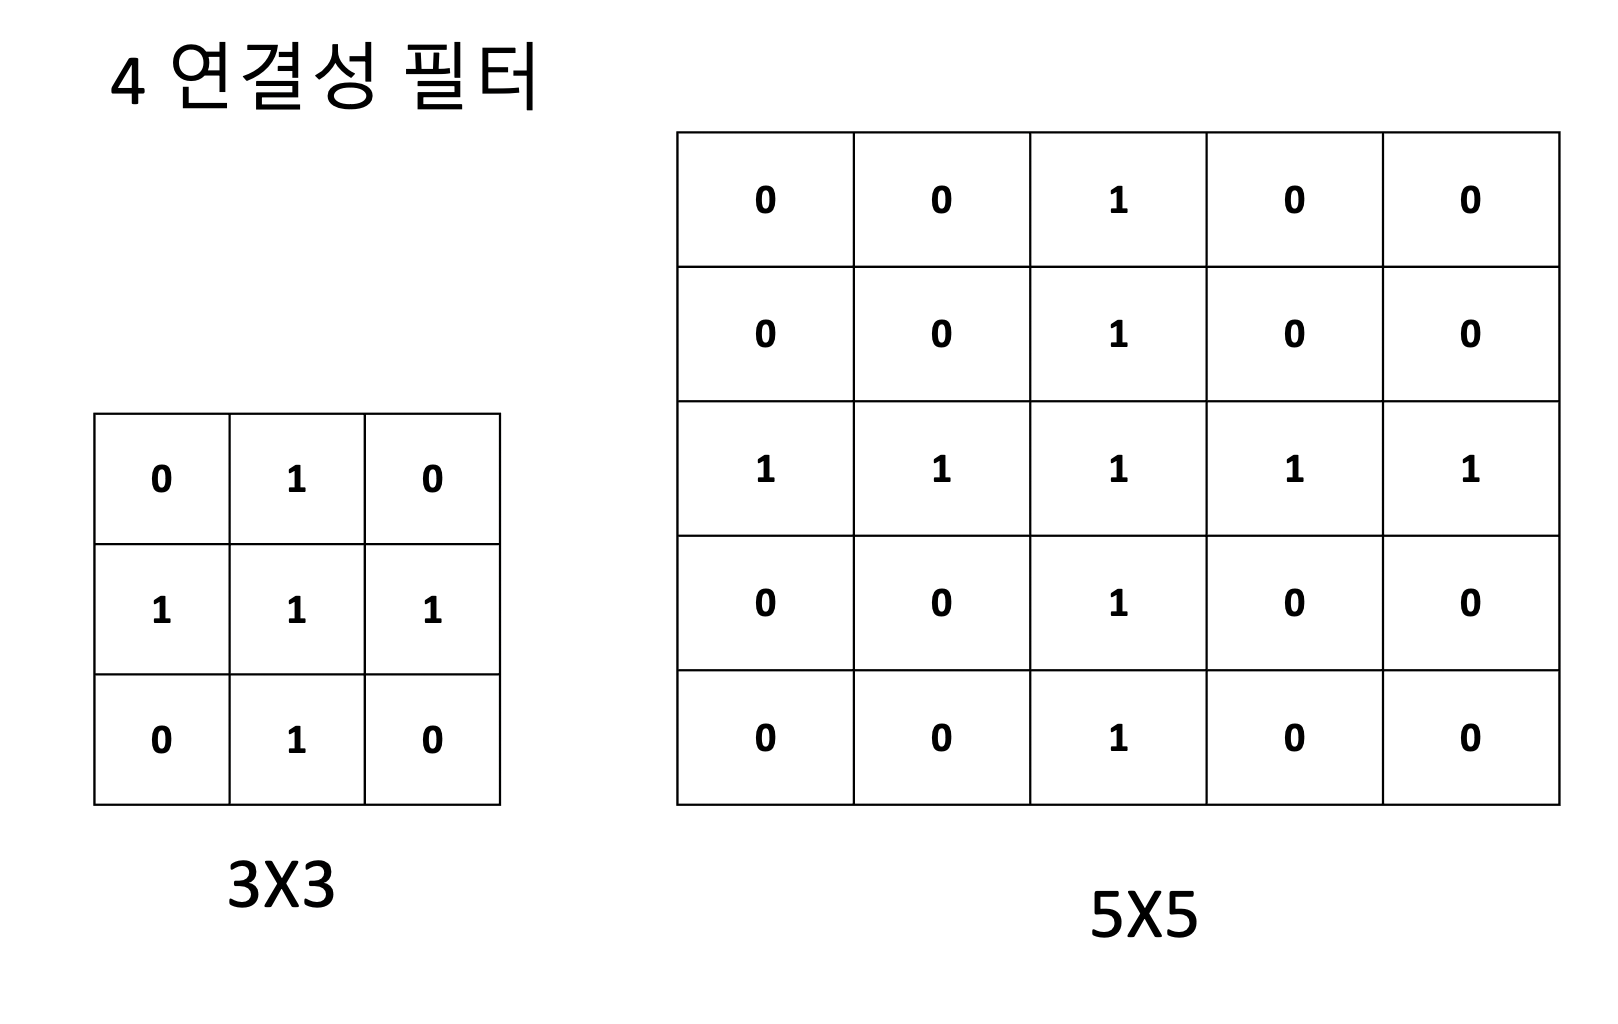

# **중요: 주어진 이진화된 영상의 검은색 부분(픽셀 값이 0인 부분) 에대하여 팽창, 침식, 열기, 닫기 과정을 수행하시오**

In [169]:
#3x3 팽창(dilatioin) 함수 작성
def diation_3x3(img):
    # 함수 작성
    output_img = copy.deepcopy(img)
    height, width  = img.shape
    for i in range(0, height-1):
      for j in range(0, height-1):
        if img[i][j] == 0:
          output_img[i-1][j] = 0
          output_img[i+1][j] = 0
          output_img[i][j-1] = 0
          output_img[i][j+1] = 0

    return output_img


#3x3 침식(erosion) 함수 작성
def erosion_3x3(img):
    # 함수 작성
    height, width  = img.shape
    mask_img = copy.deepcopy(img)
    for i in range(0, height-1):
      for j in range(0, height-1):
        if img[i][j] == 0:
          if img[i-1][j] == 0 and img[i+1][j] == 0 and img[i][j-1] == 0 and img[i][j+1] == 0:
            mask_img[i][j] = 0
          else:
            mask_img[i][j] = 255


    return mask_img

#3x3 열기(open) 함수 작성
def open_3x3(img):
    # 함수 작성
    output_img = erosion_3x3(img)
    output_img = diation_3x3(output_img)
    
    return output_img

#3x3 닫기(close) 함수 작성
def close_3x3(img):
    # 함수 작성
    output_img = diation_3x3(img)
    output_img = erosion_3x3(output_img)
    
    return output_img


#5x5 팽창(dilatioin) 함수 작성
def diation_5x5(img):
    # 함수 작성
    output_img = copy.deepcopy(img)
    height, width  = img.shape
    for i in range(0, height-1):
      for j in range(0, height-1):
        if img[i][j] == 0:
          output_img[i-1][j] = 0
          output_img[i-2][j] = 0
          output_img[i+1][j] = 0
          output_img[i+2][j] = 0
          output_img[i][j-1] = 0
          output_img[i][j-2] = 0
          output_img[i][j+1] = 0
          output_img[i][j+2] = 0

    return output_img


#5x5 침식(erosion) 함수 작성
def erosion_5x5(img):
    # 함수 작성
    height, width  = img.shape
    mask_img = copy.deepcopy(img)
    for i in range(0, height-1):
      for j in range(0, height-1):
        if img[i][j] == 0:
          if img[i-1][j] == 0 and img[i+1][j] == 0 and img[i][j-1] == 0 and img[i][j+1] == 0 and \
           img[i-2][j] == 0 and img[i+2][j] == 0 and img[i][j-2] == 0 and img[i][j+2] == 0:
            mask_img[i][j] = 0
          else:
            mask_img[i][j] = 255

    return mask_img

#5x5 열기(open) 함수 작성
def open_5x5(img):
    # 함수 작성
    output_img = erosion_5x5(img)
    output_img = diation_5x5(output_img)
    
    return output_img

#5x5 닫기(close) 함수 작성
def close_5x5(img):
    # 함수 작성
    output_img = diation_5x5(img)
    output_img = erosion_5x5(output_img)
    
    return output_img

함수를 이용하여 가시화

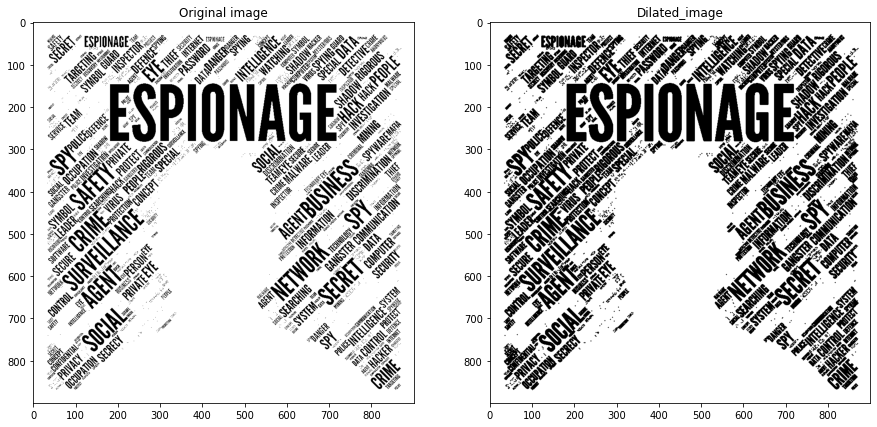

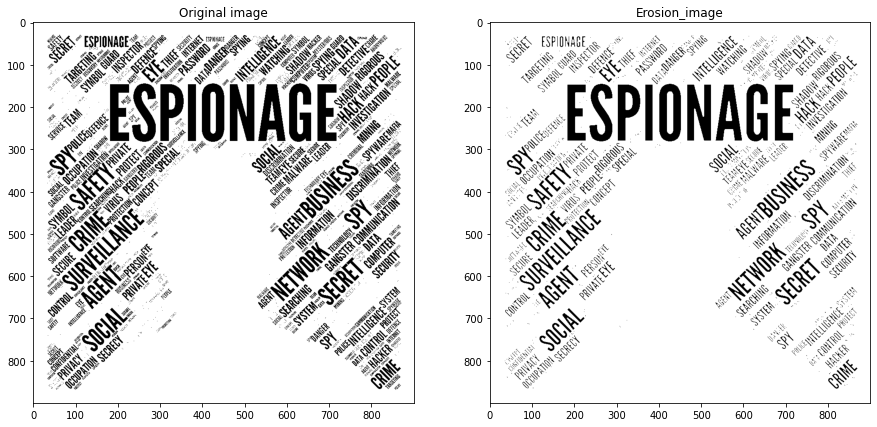

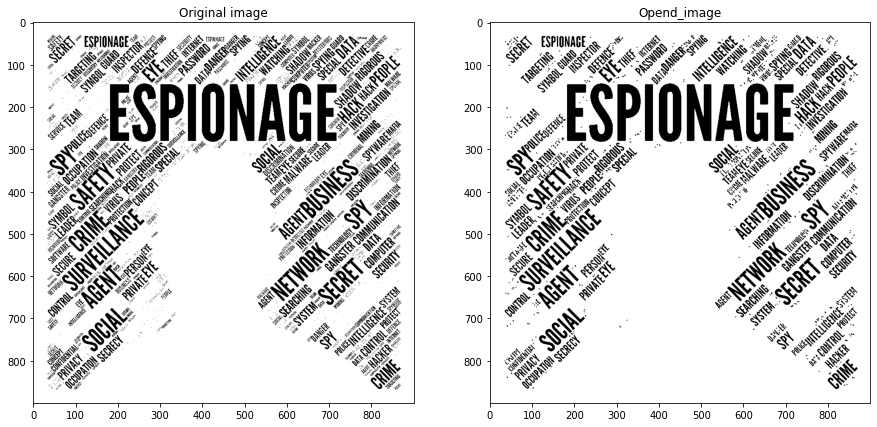

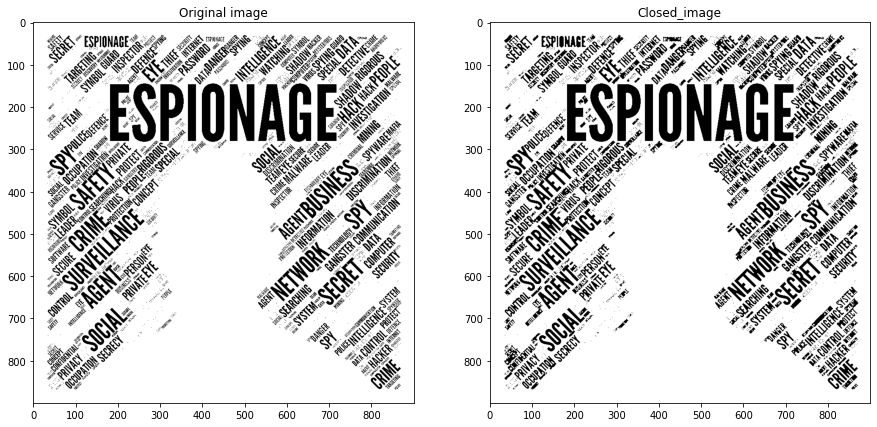

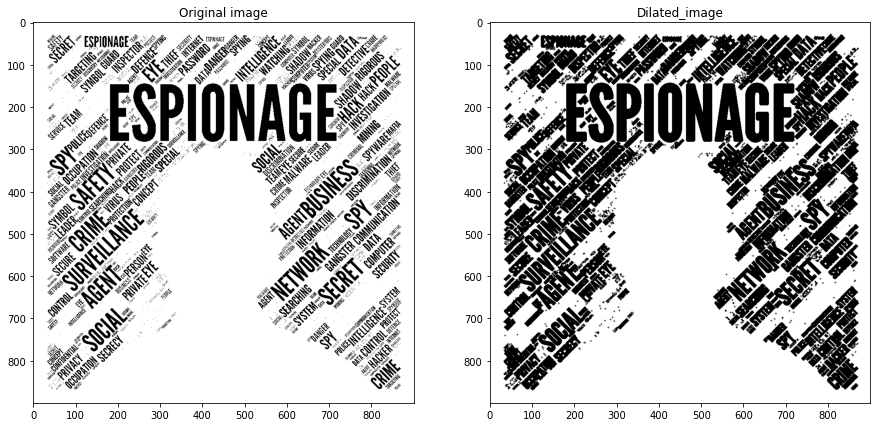

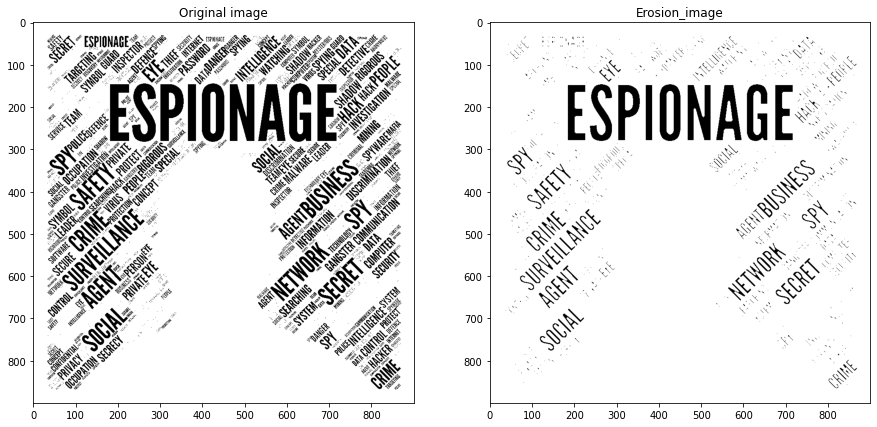

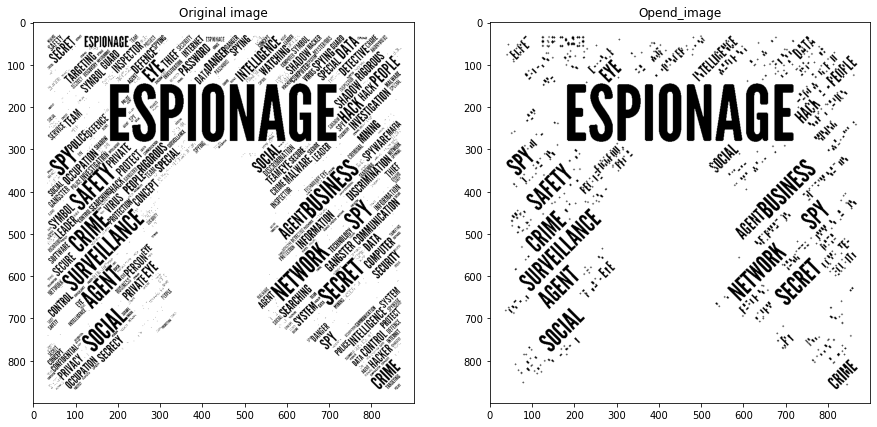

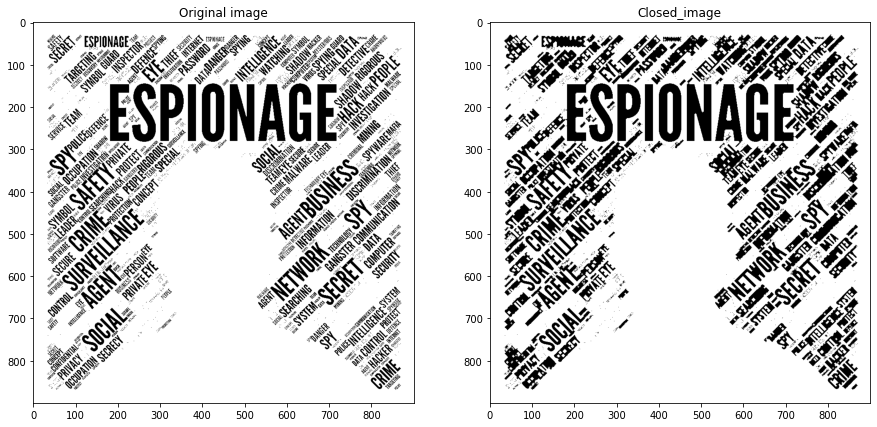

In [170]:
# 3x3
# 팽창(dilation) 결과 출력
dilated_img = diation_3x3(binary_img)
images = [binary_img, dilated_img]
titles = ['Original image', 'Dilated_image']
plot_img(images, titles)

# 침식(erosion) 결과 출력
erosion_img = erosion_3x3(binary_img)
images = [binary_img, erosion_img]
titles = ['Original image', 'Erosion_image']
plot_img(images, titles)

# 열기(open) 결과 출력
opend_img = open_3x3(binary_img)
images = [binary_img, opend_img]
titles = ['Original image', 'Opend_image']
plot_img(images, titles)

# 닫기(close) 결과 출력
closed_img = close_3x3(binary_img)
images = [binary_img, closed_img]
titles = ['Original image', 'Closed_image']
plot_img(images, titles)

# 5x5
# 팽창(dilation) 결과 출력
dilated_img = diation_5x5(binary_img)
images = [binary_img, dilated_img]
titles = ['Original image', 'Dilated_image']
plot_img(images, titles)

# 침식(erosion) 결과 출력
erosion_img = erosion_5x5(binary_img)
images = [binary_img, erosion_img]
titles = ['Original image', 'Erosion_image']
plot_img(images, titles)

# 열기(open) 결과 출력
opend_img = open_5x5(binary_img)
images = [binary_img, opend_img]
titles = ['Original image', 'Opend_image']
plot_img(images, titles)

# 닫기(close) 결과 출력
closed_img = close_5x5(binary_img)
images = [binary_img, closed_img]
titles = ['Original image', 'Closed_image']
plot_img(images, titles)
